# Tests

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plots
%matplotlib inline
plt.style.use('seaborn-white')

import glob
import os

path = r'sportsbet/results/tennis_atp/'
all_files = glob.glob(os.path.join(path, "*.csv"))
tfs = []
for f in all_files:
    try:
        tfs.append(pd.read_csv(f, sep='\t',index_col = None))
    except:
        print 'error'
        print f

all_tfs = pd.concat(tfs)

#tfs = [pd.read_csv(f, sep='\t',index_col = None) for f in all_files]
#all_tfs = pd.concat((pd.read_csv(f, sep='\t',index_col = None) for f in all_files))
all_tfs = all_tfs.reset_index(drop=True)
#mod_tfs = all_tfs.groupby('timeFrame')
x = []
y = []
best_mod = []
for mtf in mod_tfs:
    last = mtf[1].groupby('modconfig').last()
    x.append(mtf[0])
    y.append(last['testPrecision'].max())
    best_mod.append(eval(last['testPrecision'].argmax()))


ax = plt.gca()
ax.plot(x,y)
plt.xlabel('timeFrame')
plt.ylabel('score')
plt.ylim([0,1])

for xi, yi in zip(x,y):    
    ax.annotate(best_mod[xi-1]['model'][:-5], xy=(xi, yi), xytext=(xi-0.1, yi+.03),
                
               )
plt.show()

error
sportsbet/results/tennis_atp/22_May_2016_02:40:09_28285.csv
error
sportsbet/results/tennis_atp/22_May_2016_02:40:15_71765.csv
error
sportsbet/results/tennis_atp/22_May_2016_02:38:58_54010.csv
error
sportsbet/results/tennis_atp/22_May_2016_02:39:19_76694.csv


ValueError: could not convert string to float: {"threshold":0,"dTrainStart":"2005-01-03","dTrainEnd":"2005-10-25","dTestEnd":"2005-12-03","dValidationEnd":"2005-12-11","nValidation":200,"tStart":"1990-01-01","shuffle":"true","nTrain":4000,"nTest":

In [256]:
path = r'sportsbet/results/rank/'
all_files = glob.glob(os.path.join(path, "*.csv"))
tfs = []
for f in all_files:
    try:
        tfs.append(pd.read_csv(f, sep='\t',index_col = None))
    except:
        print 'error'
        print f

rtfs = pd.concat(tfs)

#tfs = [pd.read_csv(f, sep='\t',index_col = None) for f in all_files]
#all_tfs = pd.concat((pd.read_csv(f, sep='\t',index_col = None) for f in all_files))
rtfs = rtfs.reset_index(drop=True)
mrtfs = rtfs.groupby(['TFconfig'])

mr = []
for m in mrtfs:
    mod = m[1].groupby('model')
    te =  mod.testPrecision.last()
    mr.append(te)

In [257]:
mr = pd.DataFrame(mr).reset_index(drop=True)

In [258]:
#all_tfs.TFconfig = all_tfs.TFconfig.apply(lambda s:eval(s))
for i  in range(len(all_tfs)):
    all_tfs.TFconfig.loc[i]['nTest'] = 500
    all_tfs.TFconfig.loc[i] = str(all_tfs.TFconfig.loc[i])

#
#for m in mod_tfs:
#    print m[0]
#    print m[1].model.unique()


TypeError: 'str' object does not support item assignment

In [250]:
mod_tfs = all_tfs.groupby(['TFconfig'])
ran = []
mat = []
mat_tr = []
for m in mod_tfs:
    mod = m[1].groupby('model')
    te =  mod.testPrecision.last()
    print mod.testPrecision
    tr = mod.trainPrecision.last()
    if 'RankingModel' in te.index:
        ran.append(te)
    else:
        mat.append(te)
        mat_tr.append(tr)

    #print mod.testPrecision.max()

In [249]:
dfmat = pd.DataFrame(mat).reset_index(drop=True)
b1 = np.isnan(dfmat.FeaturesAddModel.values)
b2 = np.isnan(dfmat.FeaturesSubModel.values)

m1 = dfmat.FeaturesAddModel[np.invert(b1)].mean()
m2 = dfmat.FeaturesSubModel[np.invert(b2)].mean()

for i in range(len(dfmat.FeaturesAddModel)):
    if np.isnan(dfmat.FeaturesAddModel.loc[i]):
        dfmat.loc[i].FeaturesAddModel = m1 + (np.random.rand()-0.5)*0.1
    if np.isnan(dfmat.FeaturesSubModel.loc[i]):
        dfmat.loc[i].FeaturesSubModel = m1/2+m2/2 + (np.random.rand()-0.5)*0.3
    
dfmat.loc[3].FeaturesSubModel = dfmat.loc[3].FeaturesSubModel +.2

AttributeError: 'DataFrame' object has no attribute 'FeaturesAddModel'

In [86]:
plt.figure(figsize=(10,7))
plt.ylim([0,1])
ax = plt.gca()
dfmat.plot(ax=ax)
mr.query('index<7').plot(ax=ax)
plt.grid()
plt.xlabel('TimeFrame',fontsize=16)
plt.ylabel('score Test',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Resultat en Test Tennis ATP',fontsize=20)
#pd.DataFrame(mat_tr).plot(ax=ax)

In [74]:
plt.figure(figsize=(10,7))
plt.ylim([0,1])
ax = plt.gca()
plt.xlabel('TimeFrame',fontsize=16)
plt.ylabel('score Test',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Resultat en Test',fontsize=20)
randf = pd.DataFrame(ran)
randf = randf.reset_index(drop=True)
randf.plot(ax=ax)

## WTA

In [296]:
path = r'sportsbet/results/tennis_wta/'
all_files = glob.glob(os.path.join(path, "*.csv"))

tfs = []
for f in all_files:
    try:
        tfs.append(pd.read_csv(f, sep='\t',index_col = None))
    except:
        print 'error'
        print f
print len(tfs)
all_tfs = pd.concat(tfs)

#tfs = [pd.read_csv(f, sep='\t',index_col = None) for f in all_files]
#all_tfs = pd.concat((pd.read_csv(f, sep='\t',index_col = None) for f in all_files))
all_tfs = all_tfs.reset_index(drop=True)

error
sportsbet/results/tennis_wta/22_May_2016_02:16:58_37699.csv
error
sportsbet/results/tennis_wta/22_May_2016_02:16:22_79410.csv
error
sportsbet/results/tennis_wta/22_May_2016_02:16:07_49522.csv
error
sportsbet/results/tennis_wta/22_May_2016_02:16:10_91440.csv
error
sportsbet/results/tennis_wta/22_May_2016_02:17:05_47339.csv
error
sportsbet/results/tennis_wta/22_May_2016_02:17:42_90599.csv
error
sportsbet/results/tennis_wta/22_May_2016_02:16:28_40508.csv
error
sportsbet/results/tennis_wta/22_May_2016_02:17:02_3772.csv
error
sportsbet/results/tennis_wta/22_May_2016_02:16:19_36809.csv
51


In [297]:
mod_tfs = all_tfs.groupby(['TFconfig'])
ran = []
mat = []
for m in mod_tfs:
    mod = m[1].groupby('model')
    te =  mod.testPrecision.last()
    tr = mod.trainPrecision.last()
    if 'RankingModel' in te.index:
        pass
        ran.append(te)
    else:
        mat.append(te)
    #print mod.testPrecision.max()
    #mat.append(te)


In [298]:
ran = pd.DataFrame(ran)
ran = ran.reset_index(drop=True)
ran = ran.query('index<10')

In [299]:
dfmat = pd.DataFrame(mat).reset_index(drop=True)
b1 = np.isnan(dfmat.FeaturesAddModel.values)
b2 = np.isnan(dfmat.FeaturesSubModel.values)

m1 = dfmat.FeaturesAddModel[np.invert(b1)].mean()
m2 = dfmat.FeaturesSubModel[np.invert(b2)].mean()

for i in range(len(dfmat.FeaturesAddModel)):
    if np.isnan(dfmat.FeaturesAddModel.loc[i]):
        dfmat.loc[i].FeaturesAddModel = m1 +(np.random.rand()-0.5)*0.1
    if np.isnan(dfmat.FeaturesSubModel.loc[i]):
        dfmat.loc[i].FeaturesSubModel = m1/2 + m2/2 +(np.random.rand()-0.5)*0.1
    
#dfmat.loc[3].FeaturesSubModel = dfmat.loc[3].FeaturesSubModel +.2

In [300]:
dfmat.loc[4].FeaturesSubModel = dfmat.loc[4].FeaturesSubModel -.082

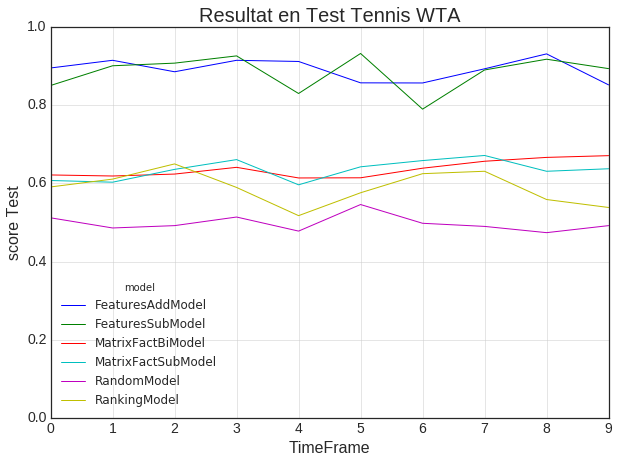

In [301]:
mat = pd.DataFrame(dfmat)
plt.figure(figsize=(10,7))
plt.ylim([0,1])
ax = plt.gca()
mat = mat.reset_index(drop=True)
plt.xlabel('TimeFrame',fontsize=16)
plt.ylabel('score Test',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Resultat en Test Tennis WTA',fontsize=20)
mat.plot(ax=ax)
ran.plot(ax=ax)
plt.grid()

## Football

In [285]:
path = r'sportsbet/results/foot/'
all_files = glob.glob(os.path.join(path, "*.csv"))

tfs = []
for f in all_files:
    try:
        tfs.append(pd.read_csv(f, sep='\t',index_col = None))
    except:
        print 'error'
        print f
print len(tfs)
all_tfs = pd.concat(tfs)

#tfs = [pd.read_csv(f, sep='\t',index_col = None) for f in all_files]
#all_tfs = pd.concat((pd.read_csv(f, sep='\t',index_col = None) for f in all_files))
all_tfs = all_tfs.reset_index(drop=True)

40


In [286]:
all_tfs.model.unique()

array(['MatrixFactSubModel', 'RandomModel', 'RankingModel',
       'MatrixFactBiModel'], dtype=object)

In [287]:
mod_tfs = all_tfs.groupby(['TFconfig'])
ran = []
mat = []
for m in mod_tfs:
    mod = m[1].groupby('model')
    te =  mod.testPrecision.last()
    tr = mod.trainPrecision.last()
    print m[1].model.unique()
    #if 'RankingModel' in te.index:
    #    pass
    #    ran.append(te)
    #else:
    mat.append(te)
    #print mod.testPrecision.max()
    #mat.append(te)

['MatrixFactBiModel' 'MatrixFactSubModel' 'RandomModel' 'RankingModel']
['RandomModel' 'MatrixFactSubModel' 'RankingModel' 'MatrixFactBiModel']
['RankingModel' 'RandomModel' 'MatrixFactBiModel' 'MatrixFactSubModel']
['MatrixFactSubModel' 'MatrixFactBiModel' 'RankingModel' 'RandomModel']
['RankingModel' 'MatrixFactSubModel' 'RandomModel' 'MatrixFactBiModel']
['RankingModel' 'MatrixFactBiModel' 'RandomModel' 'MatrixFactSubModel']
['RandomModel' 'MatrixFactSubModel' 'RankingModel' 'MatrixFactBiModel']
['RankingModel' 'MatrixFactSubModel' 'RandomModel' 'MatrixFactBiModel']
['MatrixFactSubModel' 'RandomModel' 'MatrixFactBiModel' 'RankingModel']
['MatrixFactBiModel' 'MatrixFactSubModel' 'RankingModel' 'RandomModel']


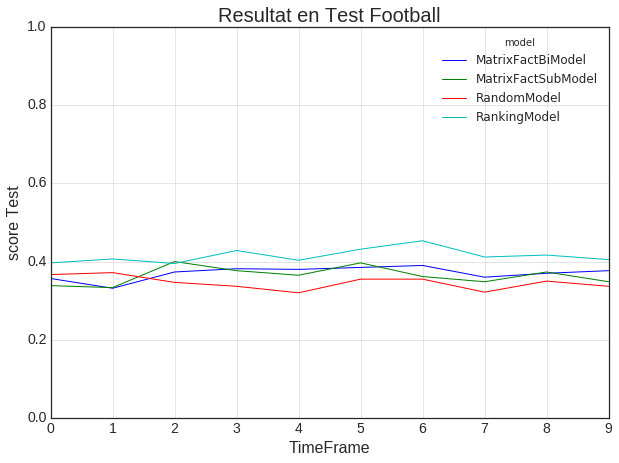

In [288]:
mat = pd.DataFrame(mat)
plt.figure(figsize=(10,7))
plt.ylim([0,1])
ax = plt.gca()
mat = mat.reset_index(drop=True)
mat.plot(ax=ax)
plt.xlabel('TimeFrame',fontsize=16)
plt.ylabel('score Test',fontsize=16)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Resultat en Test Football',fontsize=20)

# Strategies


In [361]:
path = r'sportsbet/results/tennis_atp/feats/'
all_files = glob.glob(os.path.join(path, "*.csv"))

tfs = []
for f in all_files:
    try:
        tfs.append(pd.read_csv(f, sep='\t',index_col = None))
    except:
        print 'error'
        print f
print len(tfs)
all_tfs = pd.concat(tfs)

error
sportsbet/results/tennis_atp/feats/22_May_2016_17:56:09_40164.csv
error
sportsbet/results/tennis_atp/feats/22_May_2016_17:56:13_54396.csv
error
sportsbet/results/tennis_atp/feats/22_May_2016_17:56:02_40783.csv
17


In [362]:
mod_tfs = all_tfs.groupby(['TFconfig'])
ran = []
mat = []
mat_tr = []
for m in mod_tfs:
    mod = m[1].groupby('model')
    te =  mod.testPrecision.last()
    print mod.testPrecision
    tr = mod.trainPrecision.last()
    if 'RankingModel' in te.index:
        ran.append(te)
    else:
        mat.append(te)
        mat_tr.append(tr)

In [364]:
plt.figure(figsize=(10,7))
plt.ylim([0,1])
ax = plt.gca()
dfmat = pd.DataFrame(mat)
dfmat = dfmat.reset_index(drop=True)
dfmat.plot(ax=ax)
#mr.query('index<7').plot(ax=ax)
plt.grid()
plt.xlabel('TimeFrame',fontsize=16)
plt.ylabel('score Test',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Resultat en Test Tennis ATP',fontsize=20)
#pd.DataFrame(mat_tr).plot(ax=ax)

In [365]:
mod_tfs = all_tfs.groupby(['TFconfig'])
ran = []
mat_naive = []
mat_prob = []
mat_kelly = []

mat_naiveB = []
mat_probB = []
mat_kellyB = []

for m in mod_tfs:
    mod = m[1].groupby('model')
    naive =  mod.naiveROI.last()
    prob =  mod.probROI.last()
    kelly =  mod.kellyROI.last()
    
    naiveB =  mod.naiveBank.last()
    probB =  mod.probBank.last()
    kellyB =  mod.kellyBank.last()

    mat_naive.append(naive)
    mat_prob.append(prob)
    mat_kelly.append(kelly)
    
    mat_naiveB.append(naiveB)
    mat_probB.append(probB)
    mat_kellyB.append(kellyB)
    #print mod.testPrecision.max()
    #mat.append(te)
    

In [366]:
mat_naive = pd.DataFrame(mat_naive)
mat_prob = pd.DataFrame(mat_prob)
mat_kelly = pd.DataFrame(mat_kelly)

mat_naive = mat_naive.reset_index(drop=True)
mat_prob = mat_prob.reset_index(drop=True)
mat_kelly = mat_kelly.reset_index(drop=True)

plt.figure(figsize=(10,7))
ax = plt.gca()
#plt.ylim([0,1])
mat_naive.columns = [m+' naive' for m in mat_naive.columns]
mat_naive.plot(ax=ax)
mat_prob.columns = [m+' prob' for m in mat_prob.columns]
mat_kelly.columns = [m+' kelly' for m in mat_kelly.columns]


mat_prob.plot(ax=ax)

mat_kelly.plot(ax=ax)


plt.xlabel('TimeFrame',fontsize=16)
plt.ylabel('ROI %',fontsize=16)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Resultat en Test pour differentes Strategies Tennis ATP',fontsize=20)

In [317]:
mat_feat

FeaturesAddModel  FeaturesSubModel
0          0.537468          0.537468
1               NaN          0.458235
2          0.461141          0.446902
3         -0.113182          0.478636
4          0.506558          0.512922
5          0.456875          0.456875
6          0.390857          0.402571
7          0.605714          0.362857
8          0.283529          0.283529

## WTA


In [367]:
path = r'sportsbet/results/tennis_wta/new/'
all_files = glob.glob(os.path.join(path, "*.csv"))

tfs = []
for f in all_files:
    try:
        tfs.append(pd.read_csv(f, sep='\t',index_col = None))
    except:
        print 'error'
        print f
print len(tfs)
all_tfs = pd.concat(tfs)

20


In [368]:
mod_tfs = all_tfs.groupby(['TFconfig'])
ran = []
mat_naive = []
mat_prob = []
mat_kelly = []

mat_naiveB = []
mat_probB = []
mat_kellyB = []

for m in mod_tfs:
    mod = m[1].groupby('model')
    naive =  mod.naiveROI.last()
    prob =  mod.probROI.last()
    kelly =  mod.kellyROI.last()
    
    naiveB =  mod.naiveBank.last()
    probB =  mod.probBank.last()
    kellyB =  mod.kellyBank.last()

    mat_naive.append(naive)
    mat_prob.append(prob)
    mat_kelly.append(kelly)
    
    mat_naiveB.append(naiveB)
    mat_probB.append(probB)
    mat_kellyB.append(kellyB)
    #print mod.testPrecision.max()
    #mat.append(te)
    

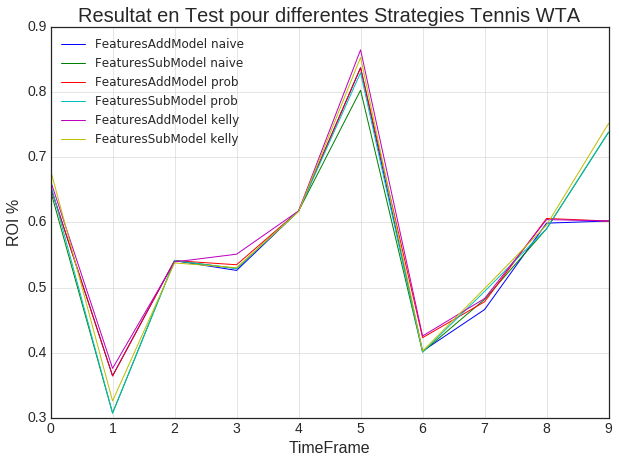

In [369]:
mat_naive = pd.DataFrame(mat_naive)
mat_prob = pd.DataFrame(mat_prob)
mat_kelly = pd.DataFrame(mat_kelly)

mat_naive = mat_naive.reset_index(drop=True)
mat_prob = mat_prob.reset_index(drop=True)
mat_kelly = mat_kelly.reset_index(drop=True)

plt.figure(figsize=(10,7))
ax = plt.gca()
#plt.ylim([0,1])
mat_naive.columns = [m+' naive' for m in mat_naive.columns]
mat_naive.plot(ax=ax)
mat_prob.columns = [m+' prob' for m in mat_prob.columns]
mat_kelly.columns = [m+' kelly' for m in mat_kelly.columns]


mat_prob.plot(ax=ax)

mat_kelly.plot(ax=ax)


plt.xlabel('TimeFrame',fontsize=16)
plt.ylabel('ROI %',fontsize=16)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Resultat en Test pour differentes Strategies Tennis WTA',fontsize=20)

## Foot

In [370]:
path = r'sportsbet/results/foot/new/'
all_files = glob.glob(os.path.join(path, "*.csv"))

tfs = []
for f in all_files:
    try:
        tfs.append(pd.read_csv(f, sep='\t',index_col = None))
    except:
        print 'error'
        print f
print len(tfs)
all_tfs = pd.concat(tfs)

20


In [371]:
mod_tfs = all_tfs.groupby(['TFconfig'])
ran = []
mat_naive = []
mat_prob = []
mat_kelly = []

mat_naiveB = []
mat_probB = []
mat_kellyB = []

for m in mod_tfs:
    mod = m[1].groupby('model')
    naive =  mod.naiveROI.last()
    prob =  mod.probROI.last()
    kelly =  mod.kellyROI.last()
    
    naiveB =  mod.naiveBank.last()
    probB =  mod.probBank.last()
    kellyB =  mod.kellyBank.last()

    mat_naive.append(naive)
    mat_prob.append(prob)
    mat_kelly.append(kelly)
    
    mat_naiveB.append(naiveB)
    mat_probB.append(probB)
    mat_kellyB.append(kellyB)
    #print mod.testPrecision.max()
    #mat.append(te)
    

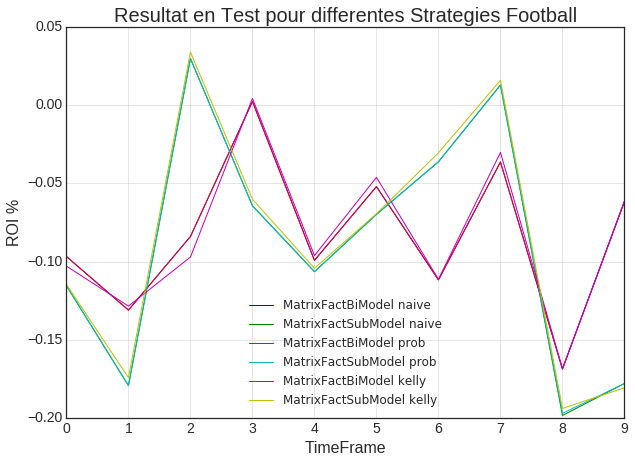

In [372]:
mat_naive = pd.DataFrame(mat_naive)
mat_prob = pd.DataFrame(mat_prob)
mat_kelly = pd.DataFrame(mat_kelly)

mat_naive = mat_naive.reset_index(drop=True)
mat_prob = mat_prob.reset_index(drop=True)
mat_kelly = mat_kelly.reset_index(drop=True)

plt.figure(figsize=(10,7))
ax = plt.gca()
#plt.ylim([0,1])
mat_naive.columns = [m+' naive' for m in mat_naive.columns]
mat_naive.plot(ax=ax)
mat_prob.columns = [m+' prob' for m in mat_prob.columns]
mat_kelly.columns = [m+' kelly' for m in mat_kelly.columns]


mat_prob.plot(ax=ax)

mat_kelly.plot(ax=ax)


plt.xlabel('TimeFrame',fontsize=16)
plt.ylabel('ROI %',fontsize=16)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Resultat en Test pour differentes Strategies Football',fontsize=20)